In [36]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [37]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=09e9dc777528545df75b509157114970


In [39]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [40]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [41]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.735023570846323 172.83095947406974
-69.32187191215633 -24.955677220466015
7.80262867651858 110.05708456440237
68.22004882577681 -177.37388880803863
49.68981880724215 -71.31300917300187
-51.26789477869171 53.124616658775494
21.87281655202993 115.08864699746738
-20.314307448110455 170.71525575468587
-31.548383757346883 55.9601068704099
61.862018658193335 -59.73800320158574
-73.2567941877925 -126.000104635111
-38.249322417822675 149.3471966753376
30.616463602950176 19.85774892601441
74.99029499918933 -99.37886988312557
67.25397199220129 -134.29811302810367
48.543784434904865 -173.01373260538645
-23.465837485108167 58.49851490732692
-60.89797026205791 -85.46041100392029
50.5785253789883 52.407213201645675
39.02006982119494 -72.1543765817136
48.995171894712314 -48.04190172761926
88.13615675060927 14.182568080441001
23.048343565953076 -55.407743346689074
3.0764325100666525 -161.05086246449955
-29.211410909518392 112.19691043266994
-48.34375453225358 2.467669826965505
-4.288749116079458 31

In [42]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [43]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [44]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | phan thiet
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | saint-ambroise
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | danshui
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | saint-joseph
Processing Record 10 of Set 1 | pangnirtung
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | lakes entrance
Processing Record 13 of Set 1 | ajdabiya
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | aklavik
Processing Record 16 of Set 1 | provideniya
Processing Record 17 of Set 1 | souillac
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | aksay
Processing Record 20 of Set 1 | mastic beach
Processing Record 21 of Set 1 | torba

Processing Record 38 of Set 4 | puerto carreno
Processing Record 39 of Set 4 | doctor pedro p. pena
City not found. Skipping...
Processing Record 40 of Set 4 | atuona
Processing Record 41 of Set 4 | solhan
Processing Record 42 of Set 4 | carnarvon
Processing Record 43 of Set 4 | yumen
Processing Record 44 of Set 4 | pasighat
Processing Record 45 of Set 4 | shahreza
Processing Record 46 of Set 4 | wencheng
Processing Record 47 of Set 4 | gornyak
Processing Record 48 of Set 4 | lucea
Processing Record 49 of Set 4 | cheremnoye
Processing Record 50 of Set 4 | nueva guinea
Processing Record 1 of Set 5 | mishan
Processing Record 2 of Set 5 | sibu
Processing Record 3 of Set 5 | yellowknife
Processing Record 4 of Set 5 | saldanha
Processing Record 5 of Set 5 | piranhas
Processing Record 6 of Set 5 | bikin
Processing Record 7 of Set 5 | beringovskiy
Processing Record 8 of Set 5 | necochea
Processing Record 9 of Set 5 | colquechaca
Processing Record 10 of Set 5 | kuche
City not found. Skipping..

Processing Record 28 of Set 8 | tilichiki
Processing Record 29 of Set 8 | mahon
Processing Record 30 of Set 8 | tevaitoa
Processing Record 31 of Set 8 | winnemucca
Processing Record 32 of Set 8 | lompoc
Processing Record 33 of Set 8 | santana do livramento
Processing Record 34 of Set 8 | fort saint james
Processing Record 35 of Set 8 | areosa
Processing Record 36 of Set 8 | dubbo
Processing Record 37 of Set 8 | avera
Processing Record 38 of Set 8 | wilmington
Processing Record 39 of Set 8 | ayagoz
Processing Record 40 of Set 8 | kushima
Processing Record 41 of Set 8 | vardo
Processing Record 42 of Set 8 | hobyo
Processing Record 43 of Set 8 | broome
Processing Record 44 of Set 8 | bambous virieux
Processing Record 45 of Set 8 | khonuu
City not found. Skipping...
Processing Record 46 of Set 8 | la ronge
Processing Record 47 of Set 8 | dolores
Processing Record 48 of Set 8 | taltal
Processing Record 49 of Set 8 | pareora
Processing Record 50 of Set 8 | nizhniy tsasuchey
Processing Record

Processing Record 16 of Set 12 | villa maria
Processing Record 17 of Set 12 | klyuchi
Processing Record 18 of Set 12 | ostrovnoy
Processing Record 19 of Set 12 | ucluelet
Processing Record 20 of Set 12 | husavik
Processing Record 21 of Set 12 | ternate
Processing Record 22 of Set 12 | hudson bay
Processing Record 23 of Set 12 | jerome
Processing Record 24 of Set 12 | pak phanang
Processing Record 25 of Set 12 | victor harbor
Processing Record 26 of Set 12 | sebinkarahisar
Processing Record 27 of Set 12 | kayerkan
Processing Record 28 of Set 12 | barguzin
Processing Record 29 of Set 12 | dudinka
Processing Record 30 of Set 12 | pozo colorado
Processing Record 31 of Set 12 | amderma
City not found. Skipping...
Processing Record 32 of Set 12 | burnie
Processing Record 33 of Set 12 | beira
Processing Record 34 of Set 12 | nova olimpia
Processing Record 35 of Set 12 | tazovskiy
Processing Record 36 of Set 12 | stubbekobing
Processing Record 37 of Set 12 | hamilton
Processing Record 38 of Se

In [48]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-08-05 23:25:26,3.0707,172.7902,81.91,75,81,9.01
1,Mar Del Plata,AR,2022-08-05 23:24:32,-38.0023,-57.5575,48.22,85,0,5.01
2,Phan Thiet,VN,2022-08-05 23:25:27,10.9333,108.1000,76.98,85,100,10.78
3,Saint-Ambroise,CA,2022-08-05 23:25:27,48.5501,-71.3324,72.14,66,28,3.51
4,Danshui,CN,2022-08-05 23:25:28,22.7984,114.4672,78.24,92,89,3.62
5,Isangel,VU,2022-08-05 23:25:28,-19.5500,169.2667,82.51,69,20,4.61
6,Saint-Joseph,RE,2022-08-05 23:25:28,-21.3667,55.6167,65.21,72,27,6.08
7,Pangnirtung,CA,2022-08-05 23:25:29,66.1451,-65.7125,41.13,96,100,2.33
8,Rikitea,PF,2022-08-05 23:23:29,-23.1203,-134.9692,70.36,61,35,19.42
9,Lakes Entrance,AU,2022-08-05 23:25:21,-37.8811,147.9810,52.16,72,70,7.99


In [49]:
# Create the output file (CSV).
output_data_file = "C:\\Users\\cloes\\OneDrive\\Desktop\\World_Weather_Analysis\\weather_data\\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [50]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

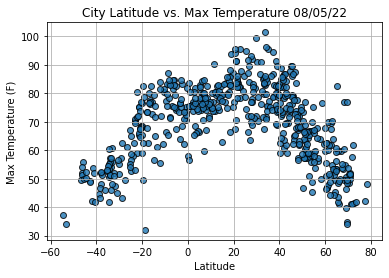

In [51]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

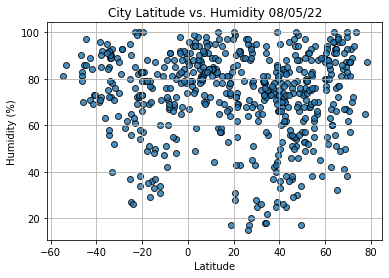

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig3.png'

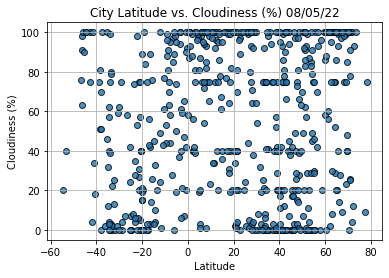

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig4.png'

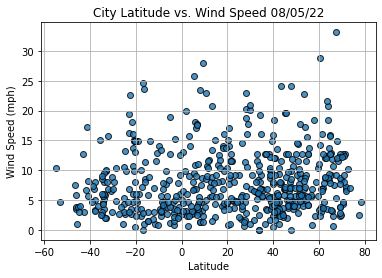

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()